Jahn Juhlia Panda Lu

Student ID 47677759

# Assignment 2
### Deep Learning for Image Classification

## Task 1 - Data Exploration and Preparation

### 1.1 Data Exploration

Before diving into any dataset, it is always a must to gain a sufficient understanding of the data through data exploration. First, I will be importing the necessary libraries and modules for data loading, exploration, and visualization namely:
- `os`: This module is used for operating functionalities dependent on the system of the user, and this will be used in this notebook to navigate through the local directories of the containing folder to locate certain files or datasets.
- `matplotlib.pyplot`: This is the standard plotting library for creating visualizations and graphs, as well as displaying images and their properties. In this notebook, this will be used to visualize some images and the metadata associated with them.
- `tensorflow`: This library handles deep learning tasks, and in this notebook, it will be used to load, prepare, and manipulate image data.
- `numpy`: This library handles arrays with multiple dimensions and matrices. In this notebook, it will be used to work with image data in numeric form.

In [1]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

After importing the necessary libraries and modules, I will be defining the path to the dataset directory, specifically the training dataset -- because this set typically contains the bulk of the data which we will need to preprocess, analyze, and perform model training on.

In [3]:
data_dir = "data/seg_train"

I can observe that the folder structure of the dataset directories corresponds to different classes of the images contained within. 

![Folder Structure](images/folder_structure.png)

Using the `os` library, I can retrieve these classes from the dataset directory to help generate their respected labels. I will also sort the classes alphabetically and assign them to the variable `CLASS_NAMES`.

In [5]:
CLASS_NAMES = sorted(os.listdir(data_dir))
print("CLASS_NAMES:", CLASS_NAMES)

CLASS_NAMES: ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


I can observe that the class names in the dataset are the following:
- buildings
- forest
- glacier
- mountain
- sea
- street

Next, I will examine what an image from each class would typically look like to gain a more thorough understanding of the data I am dealing with and to get a better sense of what kind of images are contained within the dataset. Through this, I can also verify that the dimensions of each image are consistent throughout the dataset.

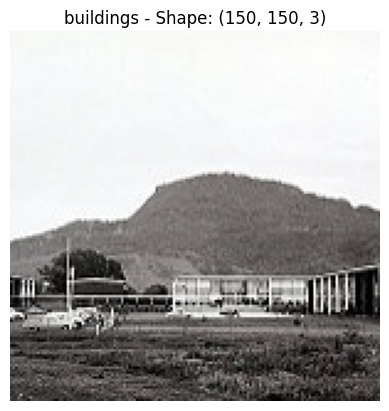

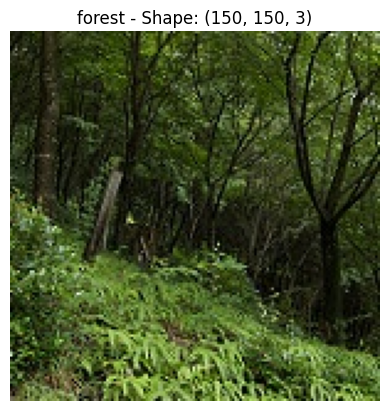

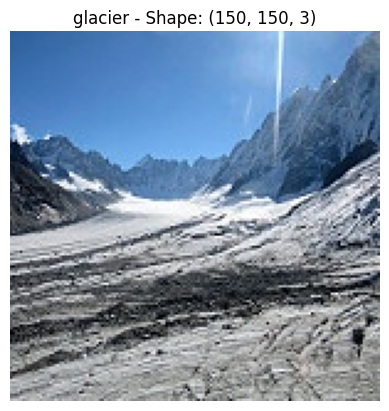

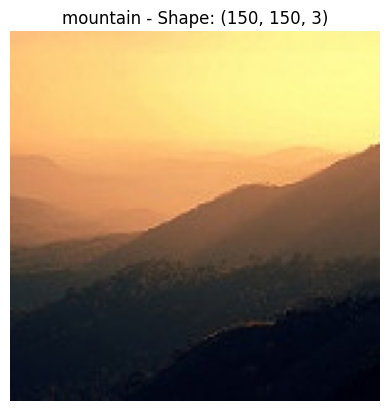

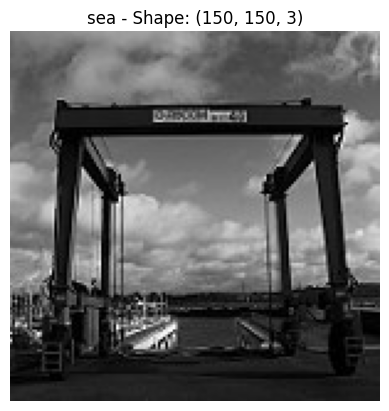

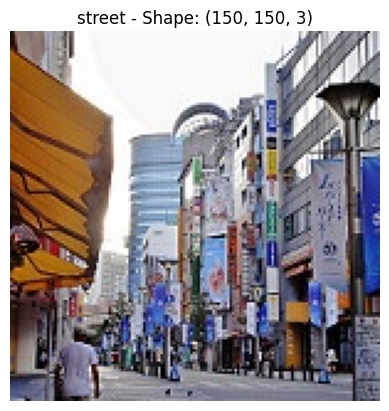

In [6]:
for class_name in CLASS_NAMES:
    # This will define the path to the current class in the for loop
    class_path = os.path.join(data_dir, class_name)
    
    # This will display the first image of the current class
    first_image_path = os.path.join(class_path, os.listdir(class_path)[0])
    img = plt.imread(first_image_path) # Read the image using matplotlib
    
    # Display the image along with its respective dimensions
    plt.imshow(img)
    plt.title(f"{class_name} - Shape: {img.shape}")
    plt.axis('off')
    plt.show()

I can observe that the images contained within the dataset have consistent dimensions of *(150, 150, 3)*, which means that each image is `150*150px`, with `3` channels representing the 3 RGB channels, indicating that the images all are in RGB format despite some images (the first image of the sea class, for example) appearing to be grayscale. The images having uniform dimensions and formatting is crucial for the neural network's functionality as deep learning models generally require uniform input dimensions.

Next, I will be counting the images per class, and I will be doing so in both the `training` and `test` directories to determine if there are any significant differences. I will first define the paths to both directories.

In [7]:
train_data_dir = "data/seg_train"
test_data_dir = "data/seg_test"

Next, I will be creating a function to count the number of images contained in each class for both the `training` and `test` set.

In [8]:
def count_images_per_class(directory):
    count = {}
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        img_count = len(os.listdir(class_path))
        count[class_name] = img_count
    return count

Now, I can call the image count function on the `training` and `test` set to check the count of images contained in each class within.

In [12]:
train_count = count_images_per_class(train_data_dir)
test_count = count_images_per_class(test_data_dir)

print("Training set image count by class:")
for class_name, count in train_count.items():
    print(f"{class_name}: {count} images")

print("\nTest set image count by class:")
for class_name, count in test_count.items():
    print(f"{class_name}: {count} images")

Training set image count by class:
buildings: 2191 images
forest: 2271 images
glacier: 2404 images
mountain: 2512 images
sea: 2274 images
street: 2382 images

Test set image count by class:
buildings: 437 images
forest: 474 images
glacier: 553 images
mountain: 525 images
sea: 510 images
street: 501 images


To gain a better understanding, I will be visualizing these results using a bar chart. I will use `.keys()` and `.values()` to list each class name and its corresponding count for the training and test sets.

In [13]:
train_classes = list(train_count.keys())
train_values = list(train_count.values())

test_classes = list(test_count.keys())
test_values = list(test_count.values())

After extracting the values, I will create two subplots -- one for the `training` set, and another for the `test` set.

C:\Users\juhli\AppData\Local\Temp\ipykernel_57844\3252237475.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(train_classes, rotation=45)
C:\Users\juhli\AppData\Local\Temp\ipykernel_57844\3252237475.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(test_classes, rotation=45)


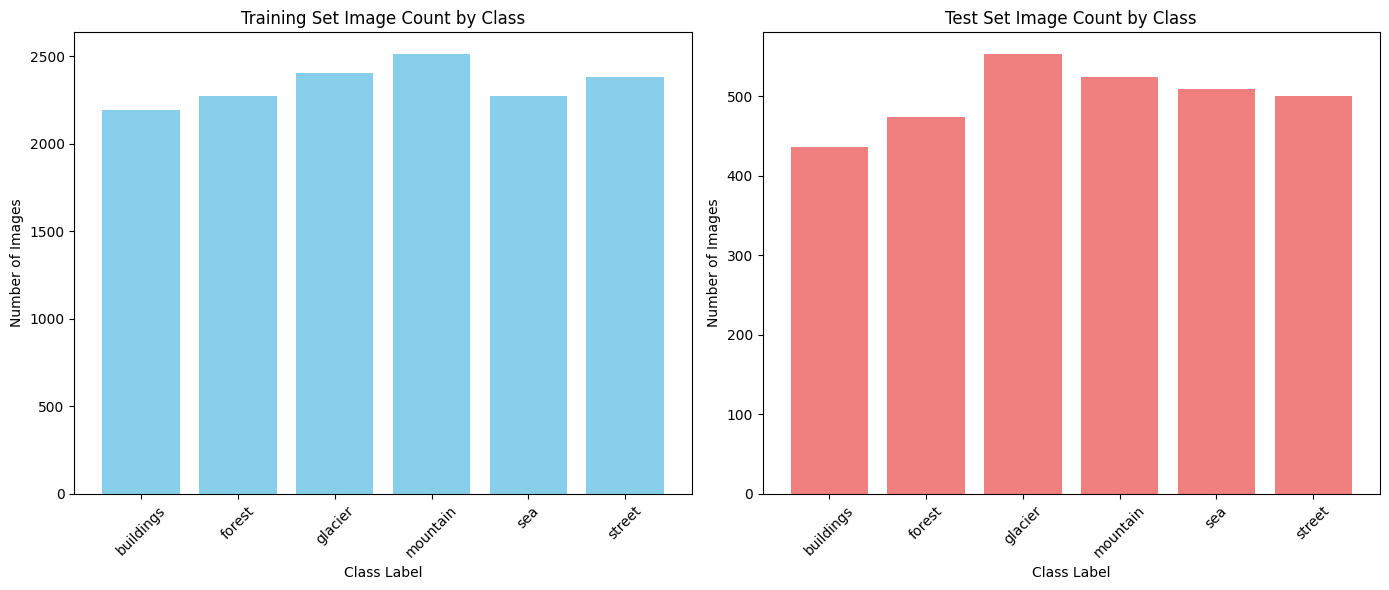

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Training Set
axes[0].bar(train_classes, train_values, color='skyblue')
axes[0].set_title('Training Set Image Count by Class')
axes[0].set_xlabel('Class Label')
axes[0].set_ylabel('Number of Images')
axes[0].set_xticklabels(train_classes, rotation=45)

# Test Set
axes[1].bar(test_classes, test_values, color='lightcoral')
axes[1].set_title('Test Set Image Count by Class')
axes[1].set_xlabel('Class Label')
axes[1].set_ylabel('Number of Images')
axes[1].set_xticklabels(test_classes, rotation=45)

plt.tight_layout()
plt.show()

Based on the analytics above, I can make the following observations:
- The training and test set contains a relatively balanced image count across all six classes with very little variation. This eliminates a lot of bias towards any of the classes, especially with a model that is tuned well.
- The test set contains sufficient images per class which will allow for a sufficient evaluation of the model's performance on unseen data. 

Additional techniques may be implemented during model training depending on the performance of the model, however with the observations on the dataset above, it is safe to assume that the model should generalize well across all classes.